<a href="https://colab.research.google.com/github/kavrangraves/AAI501-M7-PPC-Project/blob/main/AAI521_Team6_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI521-Final Project: Team 6
- Christi Moncrief  
- Adam Graves   
- Reed Oken

######################################################################################
##Edge IoT Device for Detecting and Counting People in a Region Of Interest
######################################################################################

In [ ]:
#@title 1: Install ultralytics for YOLO library
!pip install ultralytics

In [ ]:
#@title 1.1: Loading related libraries
import cv2
from ultralytics import YOLO

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import os
import subprocess
from tqdm.notebook import tqdm

import IPython
from IPython.display import Video, display
%matplotlib inline
import urllib.request
import shutil

In [ ]:
#@title 2: Loading a YOLO model
model = YOLO('yolov8x.pt')

# Enhance the YOLO model with additional knowledge transfer to help with unique lighting or busy ROI
model.train(data="coco128.yaml", epochs=3)  # train the model

#geting names from classes
dict_classes = model.model.names

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, o

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      13.4G     0.9042     0.7876      1.183        127        640: 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        128        929      0.803      0.729      0.827      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      13.8G     0.9532     0.8251      1.147        209        640: 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        128        929      0.843      0.739      0.844      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      13.8G     0.8626     0.6841      1.113        174        640: 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        128        929      0.849      0.743      0.835      0.683



3 epochs completed in 0.009 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.9MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.9MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


                   all        128        929      0.843      0.739      0.844      0.689
                person        128        254      0.951      0.691      0.883      0.683
               bicycle        128          6      0.872        0.5      0.699      0.569
                   car        128         46          1      0.339      0.662      0.362
            motorcycle        128          5      0.931          1      0.995      0.835
              airplane        128          6      0.999          1      0.995      0.949
                   bus        128          7      0.826      0.714       0.85       0.74
                 train        128          3      0.886          1      0.995      0.963
                 truck        128         12      0.977        0.5      0.759      0.505
                  boat        128          6          1      0.666      0.827      0.591
         traffic light        128         14      0.769      0.241      0.428      0.314
             stop sig

In [ ]:
#@title 2.1: Load video (emulate capture)
# Video  path for experiment
path = '/content/drive/MyDrive/AAI-521/Final/Test/City_Hall-IOT1.mp4'

In [ ]:
#@title 3: Define required functions for video processing
# process frames
def risize_frame(frame, scale_percent):
    """Function to resize frame"""
    # resize image
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    return resized

# Filter the history of tracked objects
def filter_tracks(centers, patience):
    """Function to filter the history of tracked objects"""
    filter_dict = {}
    for k, i in centers.items():
        d_frames = i.items()
        filter_dict[k] = dict(list(d_frames)[-patience:])

    return filter_dict

# Update tracked objects
def update_tracking(centers_old,obj_center, thr_centers, lastKey, frame, frame_max):
    is_new = 0
    lastpos = [(k, list(center.keys())[-1], list(center.values())[-1]) for k, center in centers_old.items()]
    lastpos = [(i[0], i[2]) for i in lastpos if abs(i[1] - frame) <= frame_max]
    # Calculating distance from existing centers points
    previous_pos = [(k,obj_center) for k,centers in lastpos if (np.linalg.norm(np.array(centers) - np.array(obj_center)) < thr_centers)]
    # if distance less than a threshold, it will update its positions
    if previous_pos:
        id_obj = previous_pos[0][0]
        centers_old[id_obj][frame] = obj_center

    # Else a new ID will be set to the given object
    else:
        if lastKey:
            last = lastKey.split('D')[1]
            id_obj = 'ID' + str(int(last)+1)
        else:
            id_obj = 'ID0'

        is_new = 1
        centers_old[id_obj] = {frame:obj_center}
        lastKey = list(centers_old.keys())[-1]

    return centers_old, id_obj, is_new, lastKey

In [ ]:
#@title 3.1: Configurations for ROI objects
#Verbose during prediction
verbose = False
# Scaling percentage of original frame
scale_percent = 100
# model confidence level
conf_level = 0.7
# Threshold of centers ( old\new)
thr_centers = 20 # Pixles between objects (modify per test MP4)
#Number of max frames to consider a object lost
frame_max = 5
# Number of max tracked centers stored
patience = 100
# ROI area color transparency
alpha = 0.2

In [ ]:
#@title 4: Read video
# Reading video with cv2
video = cv2.VideoCapture(path)

In [ ]:
#@title 4.1: Set person class to detect in YOLO
# Objects to detect Yolo
class_IDS = [0] #Persons
# Auxiliary variables
centers_old = {}
obj_id = 0
end = []
frames_list = []
count_p = 0
lastKey = ''
print(f'[INFO] - Verbose during Prediction: {verbose}')

[INFO] - Verbose during Prediction: False


In [ ]:
#@title 4.2: Settings for input of video
# Original informations of video
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = video.get(cv2.CAP_PROP_FPS)
print('[INFO] - Original Dim: ', (width, height))

# Scaling Video for better performance
if scale_percent != 100:
    print('[INFO] - Scaling change may cause errors in pixels lines ')
    width = int(width * scale_percent / 100)
    height = int(height * scale_percent / 100)
    print('[INFO] - Dim Scaled: ', (width, height))

[INFO] - Original Dim:  (1920, 1080)


In [ ]:
#@title 4.3: Settings on video output
### Video output ####
video_name = 'result.mp4'
output_path = "rep_" + video_name
tmp_output_path = "tmp_" + output_path
VIDEO_CODEC = "MP4V" #set to MP4 codec

output_video = cv2.VideoWriter(tmp_output_path,
                               cv2.VideoWriter_fourcc(*VIDEO_CODEC),
                               fps, (width, height))

In [ ]:
#@title 5: Executing Recognition in an ROI section

for i in tqdm(range(int(video.get(cv2.CAP_PROP_FRAME_COUNT)))):

    # reading frame from video
    _, frame = video.read()

    # Apply Gaussian Blur to the frame
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)

    # Applying resizing of read frame
    # Making a copy of the original color frame for later display
    frame  = risize_frame(blurred_frame, scale_percent)
    original_color_frame = frame.copy() # Make copy of color for later display
    frame  = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convert to gray scale
    area_roi = [np.array([ (1800, 0),(1020,0),(0,0) ,(1800,0)], np.int32)]# ROI of entire Camera capture
    ROI = frame[0:1020, 0:1800]

    if verbose:
        print('Dimension Scaled(frame): ', (frame.shape[1], frame.shape[0]))

    # Getting predictions
    y_hat = model.predict(ROI, conf = conf_level, classes = class_IDS, device = 0, verbose = False)

    # Getting the bounding boxes, confidence and classes of the recognize objects in the current frame.
    boxes_data = y_hat[0].boxes.xyxy.cpu().numpy()
    confidences = y_hat[0].boxes.conf.cpu().numpy()
    classes = y_hat[0].boxes.cls.cpu().numpy()

    # Storing the above information in a dataframe, setting the min and max values
    positions_frame = pd.DataFrame(boxes_data, columns=['xmin', 'ymin', 'xmax', 'ymax'])
    positions_frame['conf'] = confidences
    positions_frame['class'] = classes

    #Translating the numeric class labels to text
    labels = [dict_classes[i] for i in classes]

    # Update total count of people new 11-26
    count_people += people_count_this_frame

    #handle tracking logic (Newer)
    for ix, row in enumerate(positions_frame.iterrows()):
        xmin, ymin, xmax, ymax, confidence, category = row[1].astype('int')
        # Calculating the center of the bounding box
        center_x, center_y = int(((xmax + xmin) / 2)), int(((ymax + ymin) / 2))
        # Drawing bounding box for every detection
        cv2.rectangle(ROI, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)
        # Drawing confidence score
        cv2.putText(img=ROI, text=str(np.round(confidences[ix], 2)),
                    org=(xmin, ymin - 10), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.9, color=(0, 0, 255), thickness=1)

        # Updating the tracking for each object (New)
        centers_old, id_obj, is_new, lastKey = update_tracking(centers_old, (center_x, center_y), thr_centers, lastKey, i, frame_max)

        # Drawing additional tracking info (like circles) if needed (New)
        for center_x,center_y in centers_old[id_obj].values():
            cv2.circle(ROI, (center_x,center_y), 5,(0,255,0),-1)  # Using a different color for clarity

        #Updating people in ROI
        count_p+=is_new

        #Drawing above the bounding-box the name of class recognized.
        cv2.putText(img=ROI,
            text=id_obj + ':' + str(np.round(confidences[ix], 2)),
            org=(xmin, ymin - 40),  # Adjust this value to position the text higher
            fontFace=cv2.FONT_HERSHEY_TRIPLEX,
            fontScale=0.9,
            color=(0, 0, 255),
            thickness=1)

    #drawing the number of people
    cv2.putText(img=frame, text=f'No. of People in ROI: {count_p}',
                org= (30,100), fontFace=cv2.FONT_HERSHEY_TRIPLEX,
                fontScale=3, color=(255, 255, 255), thickness=2)

    # Filtering tracks history
    centers_old = filter_tracks(centers_old, patience)
    if verbose:
        print(contador_in, contador_out)

    #Drawing the ROI area
    overlay = frame.copy()

    cv2.polylines(overlay, pts = area_roi, isClosed = True, color=(255, 0, 0),thickness=2)
    cv2.fillPoly(overlay, area_roi, (255,0,0))
    frame = cv2.addWeighted(overlay, alpha,frame , 1 - alpha, 0)

    #Saving frames in a list
    frames_list.append(frame)
    #saving transformed frames in a output video formaat
    output_video.write(frame)

#Releasing the video
output_video.release()

  0%|          | 0/341 [00:00<?, ?it/s]

In [ ]:
#@title 5.1: Process Video and Audio
# Check for Existing Output File and Remove if Present
if os.path.exists(output_path):
    os.remove(output_path)
# Process video and audio file
subprocess.run(
    ["ffmpeg",  "-i", tmp_output_path,"-crf","18","-preset","veryfast","-hide_banner","-loglevel","error","-vcodec","libx264",output_path])
os.remove(tmp_output_path)

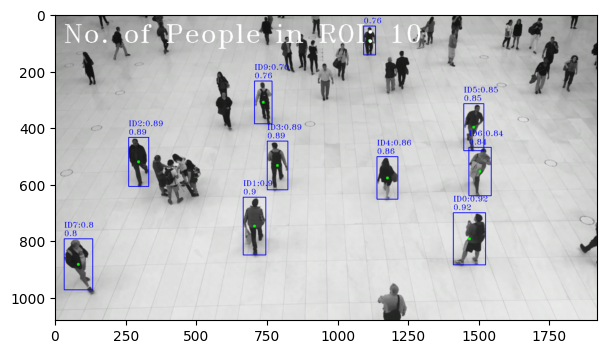

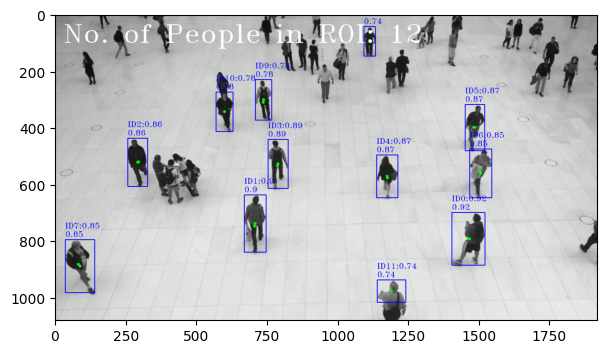

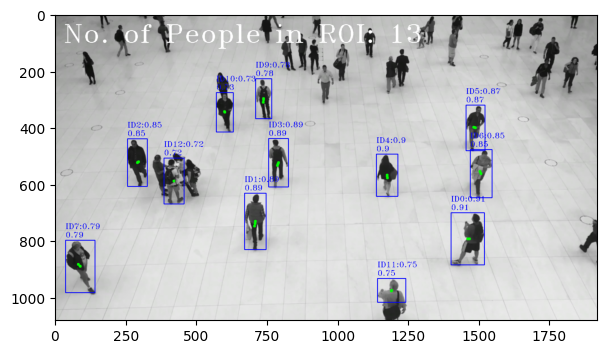

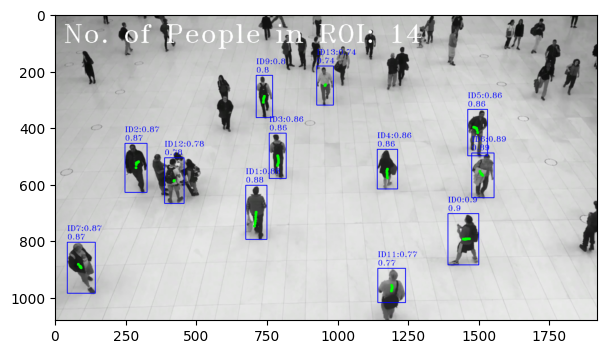

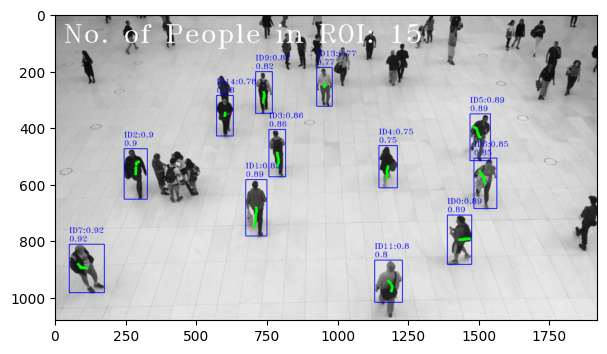

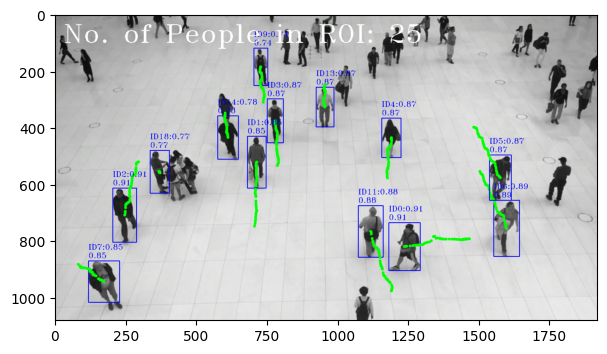

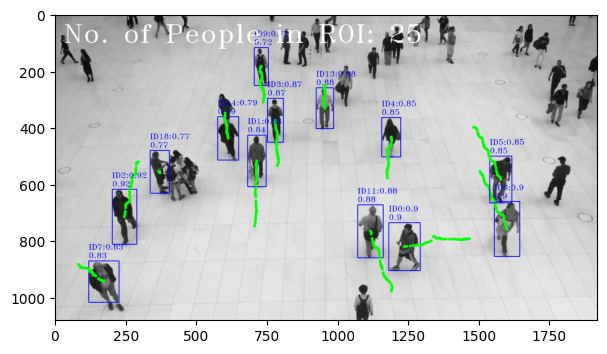

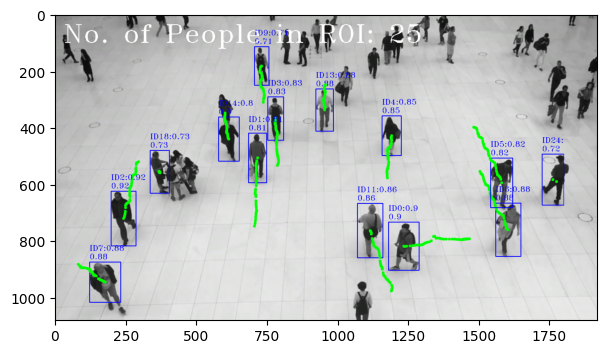

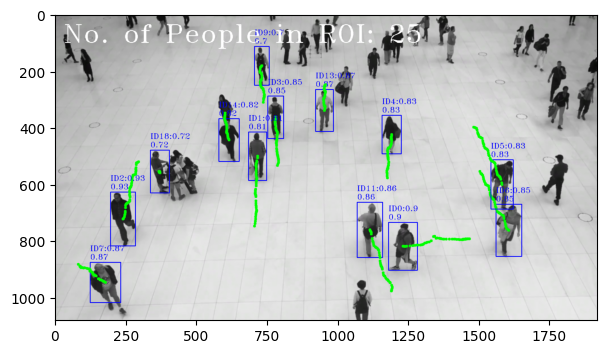

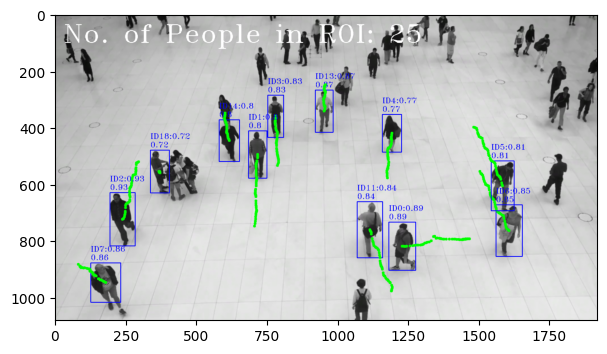

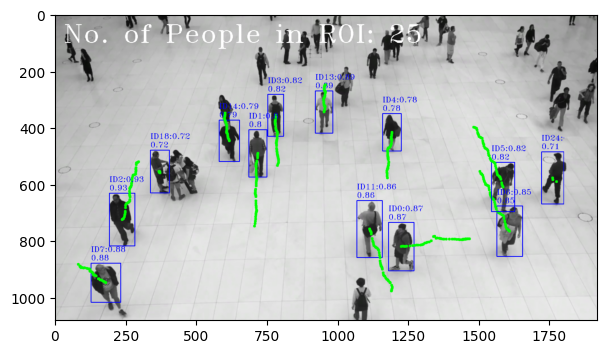

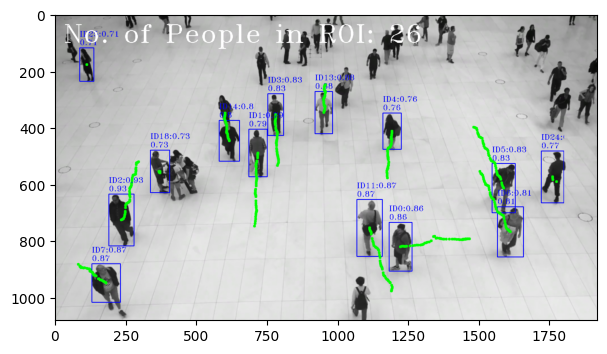

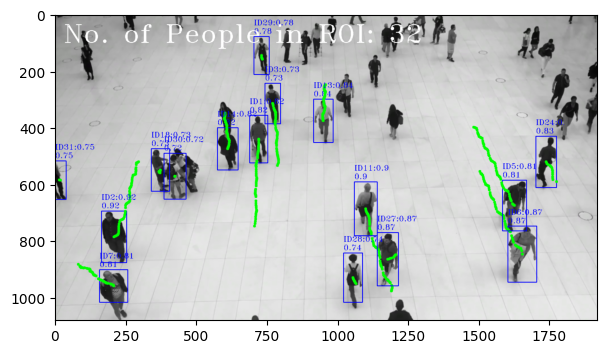

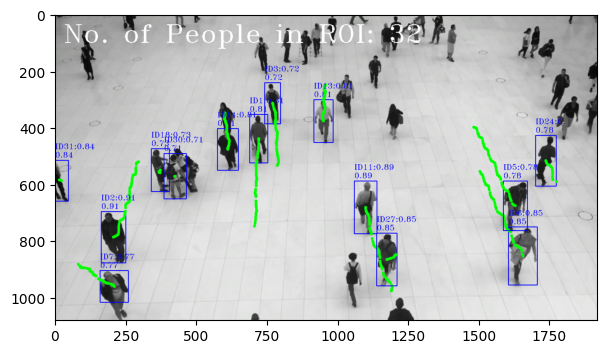

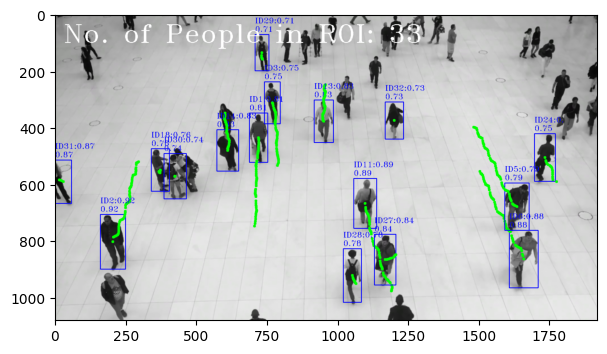

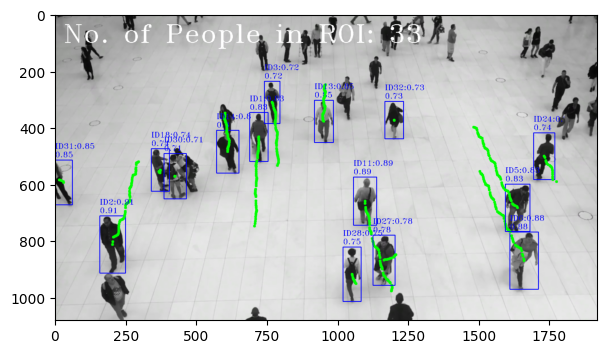

In [ ]:
#@title 5.2: Display of people and results
for i in [0,1,2,7,12,50, 51, 52, 53, 54, 55, 56, 70, 71, 72, 73]:
    plt.figure(figsize =( 7, 5))
    plt.imshow(frames_list[i])
    plt.show()